## Visualizing results

First up is results for the vanilla QAOA with two param initializations: vanilla and gaussian, and two optimizers: COBYLA and COBYQA.

In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
df_vanilla_no_ws = pd.read_csv('results_LAQA_recursive_depth1.csv', index_col=0)
df_vanilla_no_ws.head()

,param_initialization,qaoa_variant,optimizer,depth,graph_size,graph_name,time_elapsed,quantum_func_evals,obj_func_evolution,quantum_solution,quantum_obj_value,classic_solution,classic_value
index,,,,,,,,,,,,,
0,uniform,recursive,COBYLA,1,5,DFw,129.899077,32,[],[1. 1. 1. 0. 0.],3.380622,"[1.0, 1.0, 1.0, 0, 0]",3.380622
1,uniform,recursive,COBYLA,1,5,DUw,142.893740,36,[],[1. 1. 0. 0. 0.],2.854180,"[1.0, 1.0, 0, 0, 0]",2.854180
2,uniform,recursive,COBYLA,1,5,DV{,111.654159,29,[],[1. 1. 0. 0. 0.],2.169811,"[1.0, 1.0, 0, 0, 0]",2.169811
3,uniform,recursive,COBYLA,1,5,DUW,111.213010,28,[],[0. 0. 1. 1. 0.],2.389642,"[1.0, 1.0, 0, 0, 1.0]",2.389642
4,uniform,recursive,COBYLA,1,5,DC{,135.679268,33,[],[0. 1. 1. 1. 0.],2.931049,"[1.0, 1.0, 1.0, 1.0, 0]",3.376899


In [11]:
df_different = df_vanilla_no_ws[np.invert(np.isclose(df_vanilla_no_ws['quantum_obj_value'], df_vanilla_no_ws['classic_value']))]
df_different.head()


,param_initialization,qaoa_variant,optimizer,depth,graph_size,graph_name,time_elapsed,quantum_func_evals,obj_func_evolution,quantum_solution,quantum_obj_value,classic_solution,classic_value
index,,,,,,,,,,,,,
4,uniform,recursive,COBYLA,1,5,DC{,135.679268,33,[],[0. 1. 1. 1. 0.],2.931049,"[1.0, 1.0, 1.0, 1.0, 0]",3.376899
13,uniform,recursive,COBYLA,1,5,DQ{,117.599415,29,[],[1. 0. 0. 0. 1.],2.349229,"[1.0, 1.0, 0, 1.0, 0]",2.564163
23,uniform,recursive,COBYLA,1,6,EEzO,243.417012,32,[],[1. 1. 1. 0. 0. 0.],3.724812,"[1.0, 1.0, 1.0, 1.0, 0, 0]",3.909641
31,uniform,recursive,COBYLA,1,6,EEvo,215.892604,28,[],[0. 0. 0. 1. 1. 1.],3.547124,"[1.0, 1.0, 1.0, 1.0, 0, 0]",4.052653
50,uniform,recursive,COBYLA,1,7,FCOfw,332.981607,33,[],[1. 0. 1. 0. 1. 0. 0.],4.319556,"[0, 0, 1.0, 1.0, 1.0, 0, 0]",4.362722


In [14]:
from ast import literal_eval
print(df_different['graph_size'].value_counts())
df_vanilla_no_ws['quantum_solution'] = df_vanilla_no_ws['quantum_solution'].apply(lambda x: literal_eval(x))
df_vanilla_no_ws['graph_size'] = df_vanilla_no_ws['quantum_solution'].apply(lambda x: len(x))


graph_size
9    33
8    25
7    20
6     8
5     7
Name: count, dtype: int64


ValueError: malformed node or string: [1, 1, 1, 0, 0]

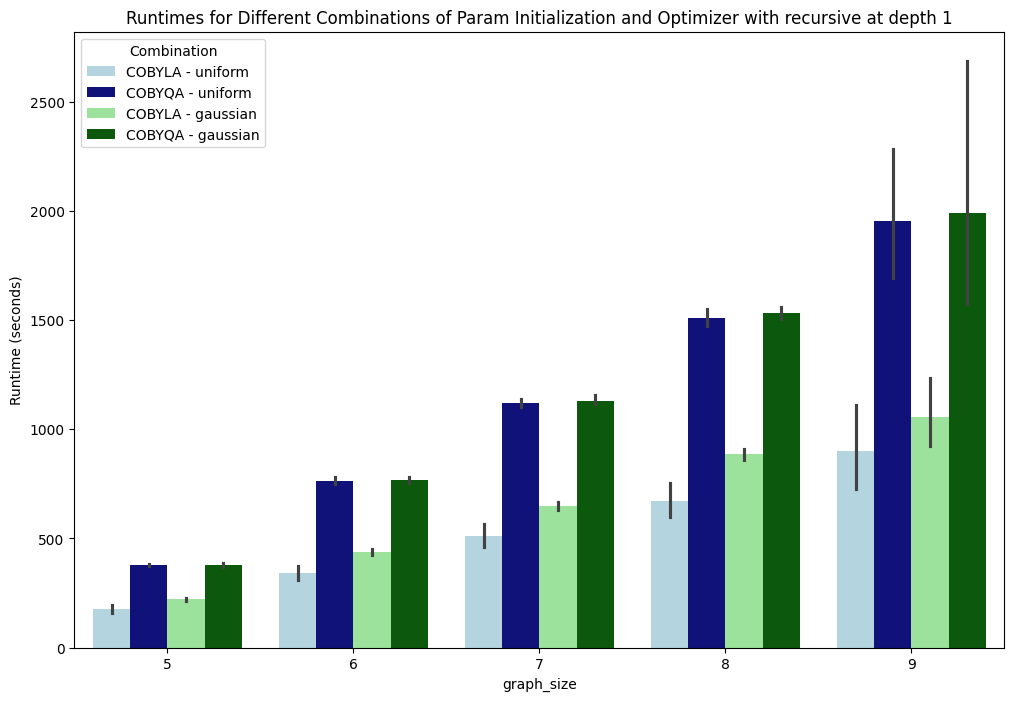

In [16]:
import seaborn as sns

# Filter the dataframe for the required combinations
filtered_df = df_vanilla_no_ws
# Create a new column for the combination of param_initialization and optimizer
filtered_df['combination'] = filtered_df['optimizer'] + ' - ' + filtered_df['param_initialization']
custom_colors = ['#ADD8E6', '#00008B', '#90EE90', '#006400']


plt.figure(figsize=(12, 8))
# Plot the data with custom colors
sns.barplot(data=filtered_df, x='graph_size', y='time_elapsed', hue='combination', palette=custom_colors)
plt.ylabel('Runtime (seconds)')
plt.title('Runtimes for Different Combinations of Param Initialization and Optimizer with recursive at depth 1')
plt.legend(title='Combination')
plt.show()

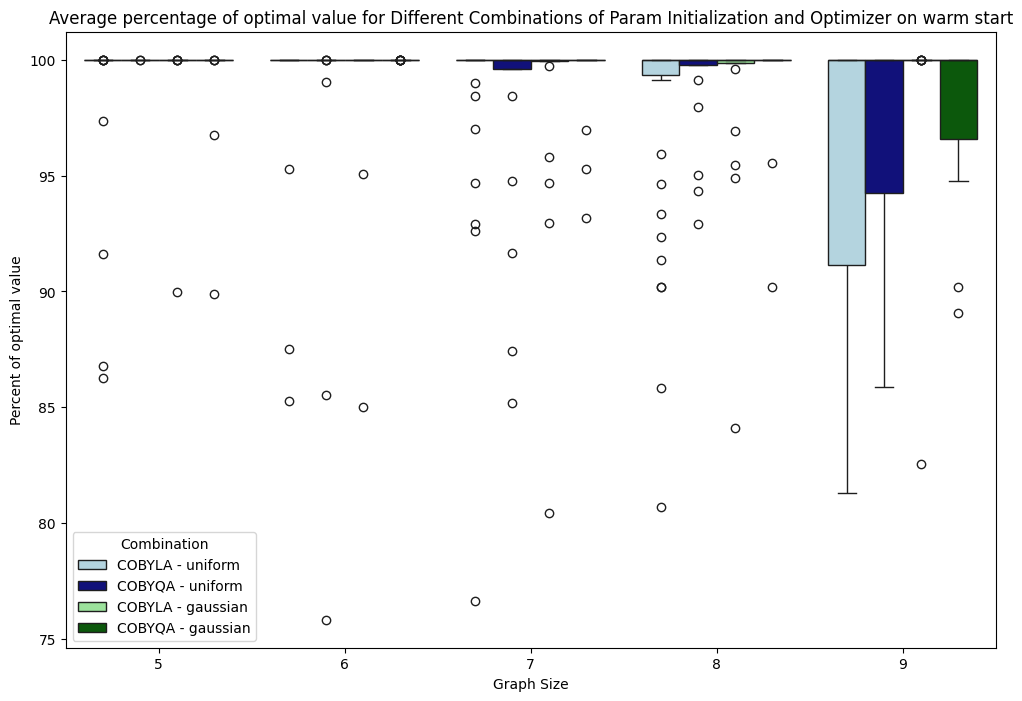

In [17]:




filtered_df['percentage_optimal'] = 100*(filtered_df['quantum_obj_value']/filtered_df['classic_value'])

# Plot the data
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df, x='graph_size', y='percentage_optimal', hue='combination', palette=custom_colors)
plt.xlabel('Graph Size')
plt.ylabel('Percent of optimal value')
plt.title('Average percentage of optimal value for Different Combinations of Param Initialization and Optimizer on warm start')
plt.legend(title='Combination')
plt.show()


C:\Users\torbjsme\AppData\Local\Temp\ipykernel_8552\1882104171.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


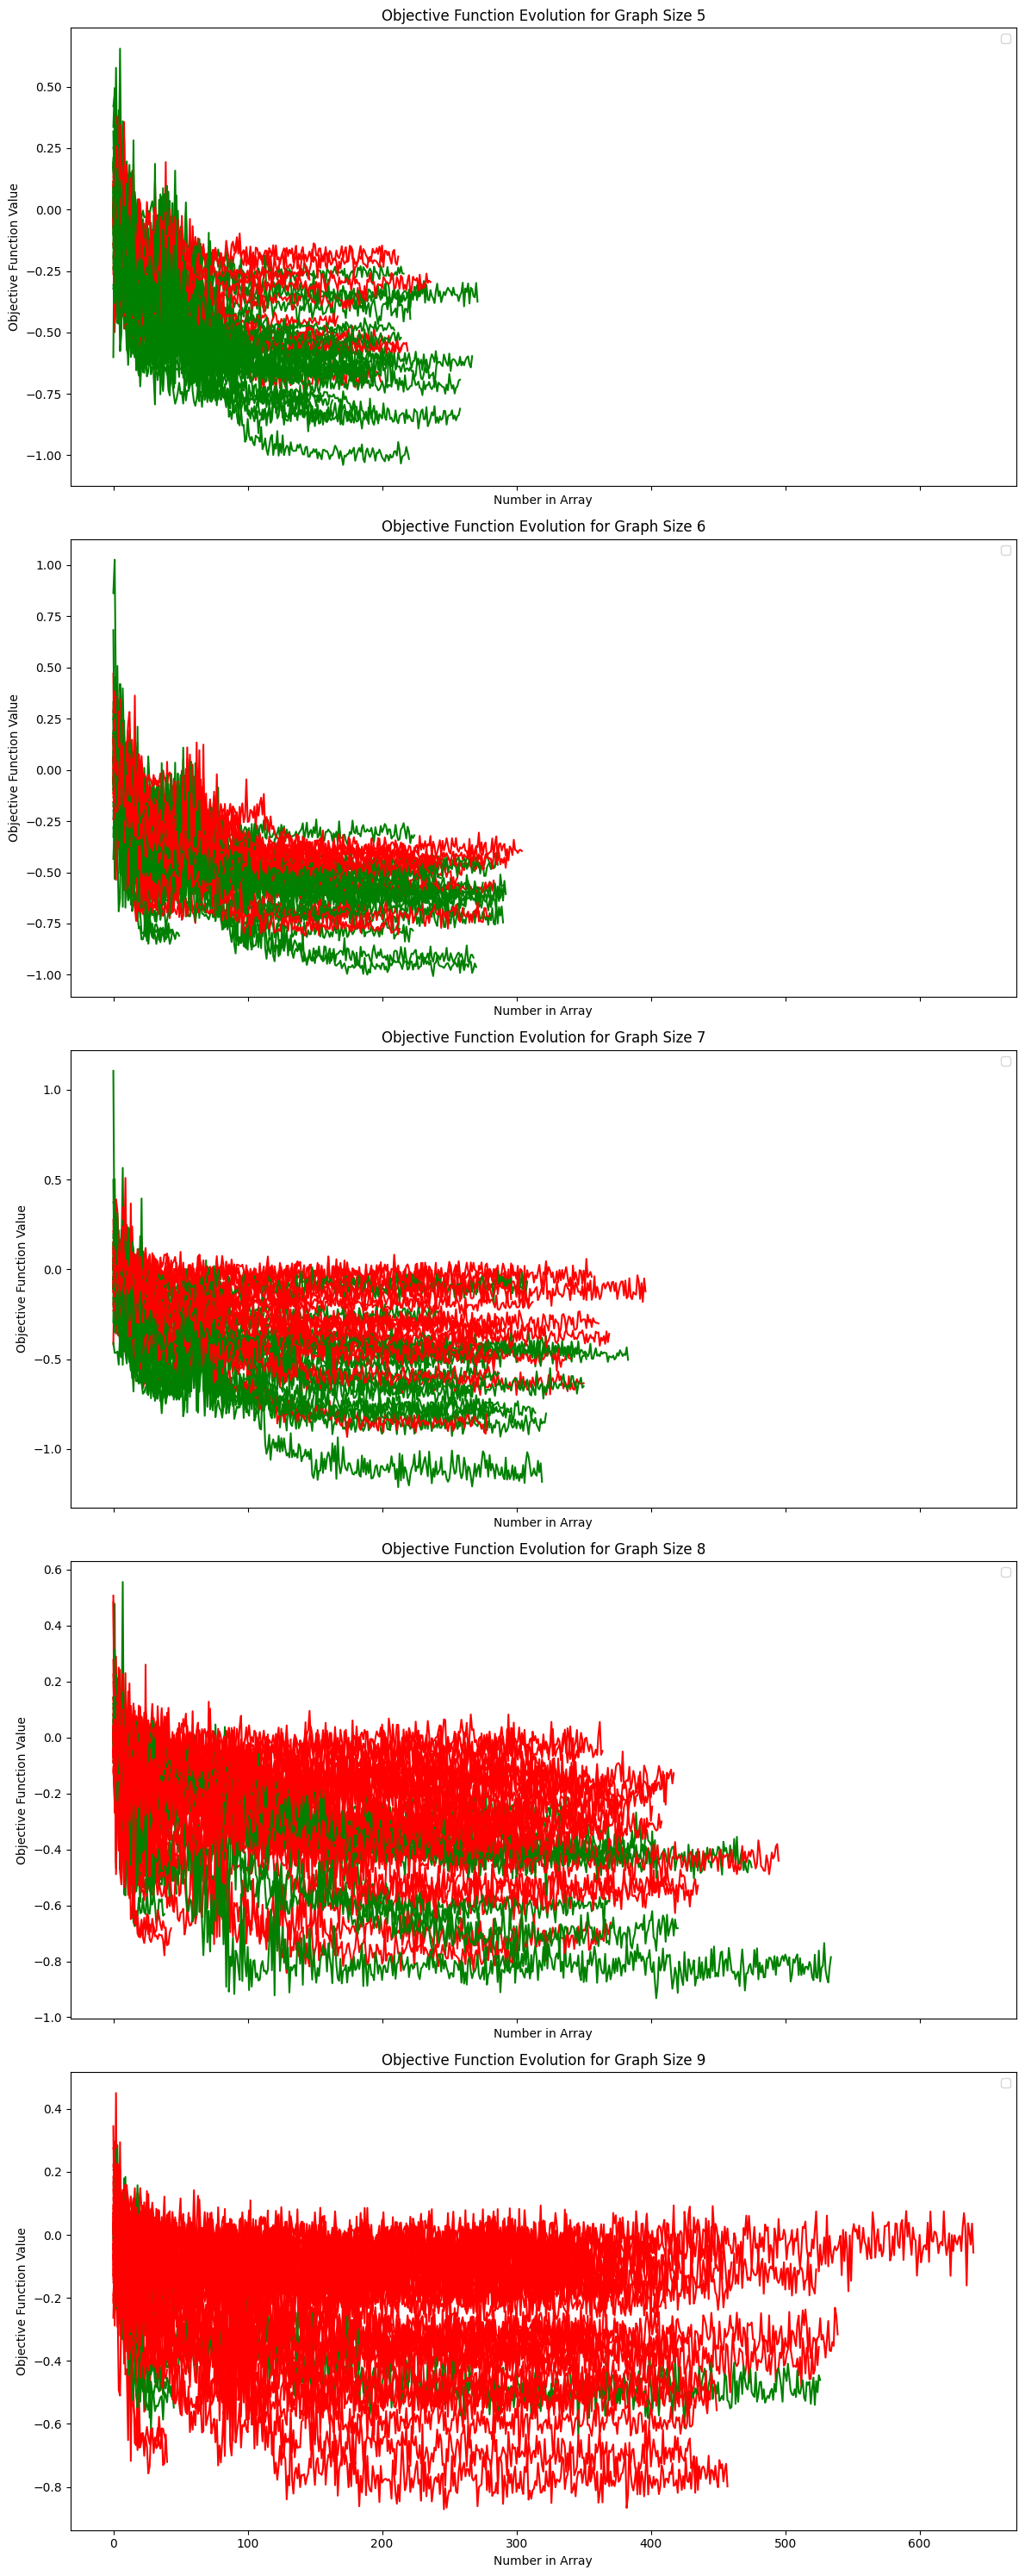

In [ ]:
# Define a function to plot the objective function evolution
import re

def find_numbers(string): 
    numbers = re.findall(r"[-+]?\d*\.?\d+(?:[eE][-+]?\d+)?", string)

    # Convert the extracted values into a NumPy array
    return np.array([float(num) for num in numbers])

def plot_obj_func_evolution(df):
    unique_graph_sizes = df['graph_size'].unique()
    num_graph_sizes = len(unique_graph_sizes)
    fig, axes = plt.subplots(num_graph_sizes, 1, figsize=(12, 6 * num_graph_sizes), sharex=True)

    if num_graph_sizes == 1:
        axes = [axes]

    for i, graph_size in enumerate(unique_graph_sizes):
        ax = axes[i]
        subset = df[df['graph_size'] == graph_size]
        for _, row in subset.iterrows():
            obj_func_evolution = find_numbers(row['obj_func_evolution'])
            color = 'green' if np.isclose(row['quantum_obj_value'], row['classic_value']) else 'red'
            ax.plot(obj_func_evolution, color=color)
        
        ax.set_title(f'Objective Function Evolution for Graph Size {graph_size}')
        ax.set_xlabel('Number in Array')
        ax.set_ylabel('Objective Function Value')
        ax.legend()

    plt.tight_layout()
    plt.show()

# Call the function with the dataframe
plot_obj_func_evolution(df_vanilla_no_ws)

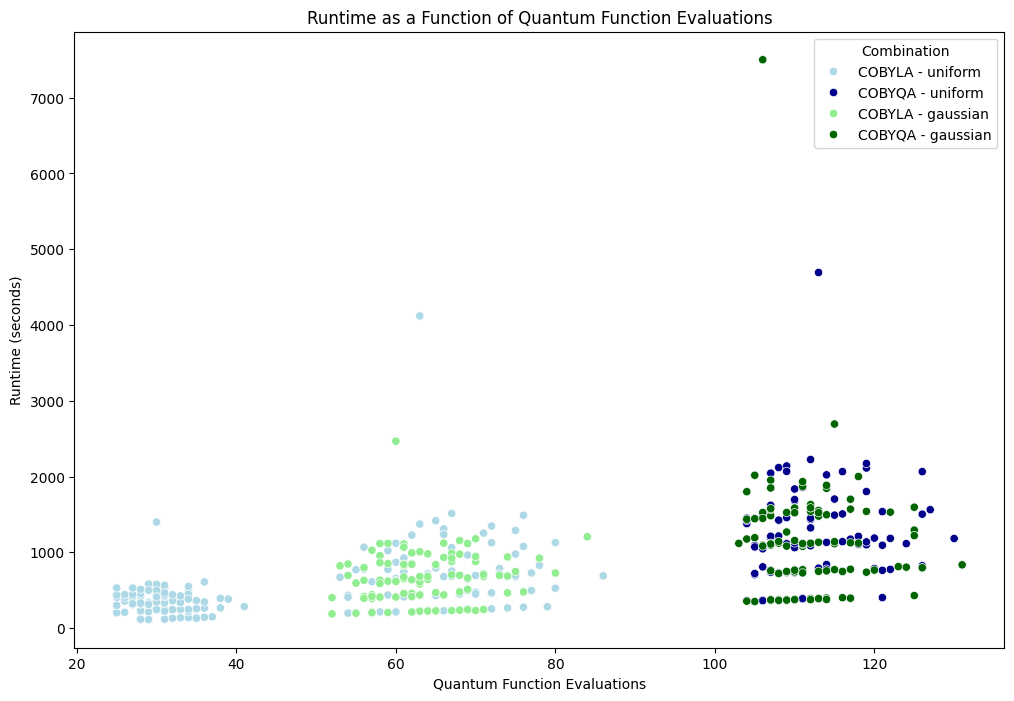

In [18]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=filtered_df, x='quantum_func_evals', y='time_elapsed', hue='combination', palette=custom_colors)
plt.xlabel('Quantum Function Evaluations')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime as a Function of Quantum Function Evaluations')
plt.legend(title='Combination')
plt.show()


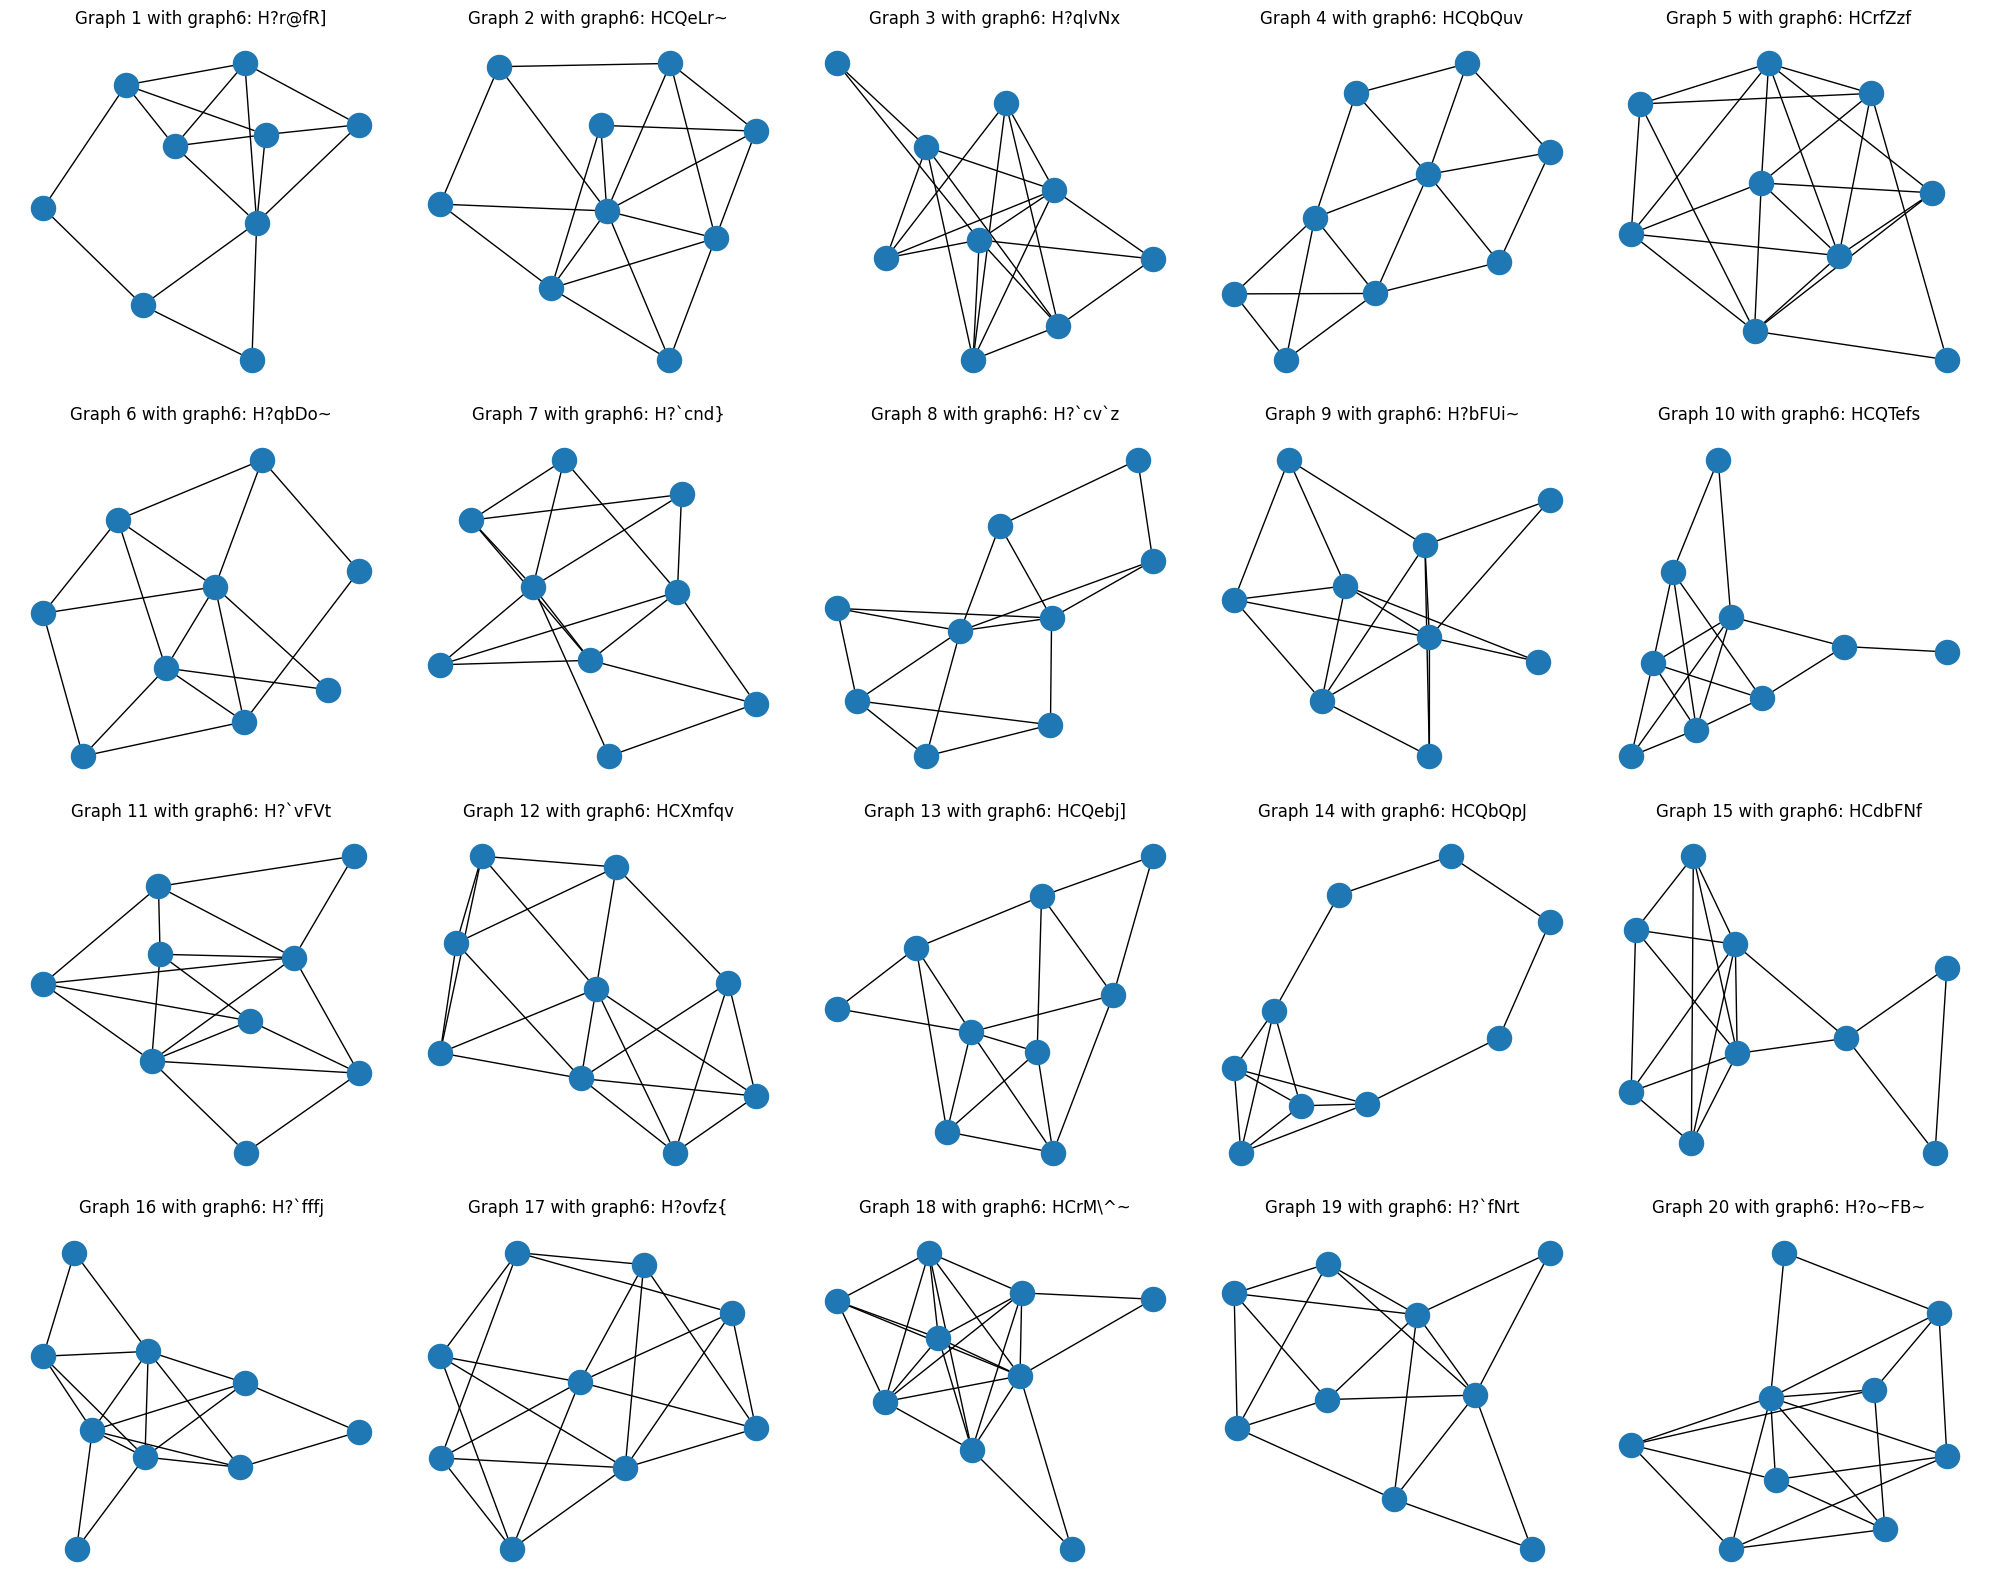

AttributeError: 'MaxCutProblem' object has no attribute 'get_graphs'

In [ ]:
from MaxCutProblem import MaxCutProblem

problem = MaxCutProblem()

problem.draw_test_graphs(9)



WeightedEdgeList[(0, 3, 0.47385744834698507), (0, 5, 0.09551898298667805), (1, 4, 0.7556428883712037), (1, 6, 0.11126571459511092), (1, 7, 0.9466342743261389), (1, 8, 0.18614278482579283), (2, 5, 0.024019654474285224), (2, 6, 0.1637309110088755), (3, 7, 0.5084902241875061), (4, 6, 0.3532346161829948), (4, 7, 0.6907634734232918), (4, 8, 0.07714031855678716), (6, 8, 0.07297403722419149), (7, 8, 0.7945584594619457)]


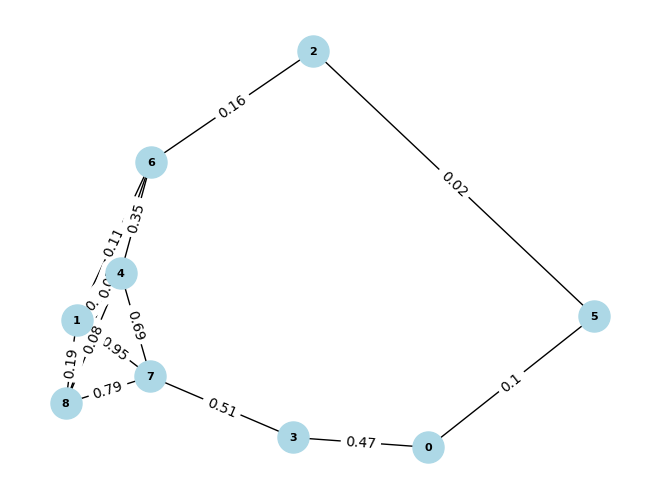

In [30]:
import networkx as nx

graphs,names = problem.get_test_graphs(9)

print(graphs[names.index('HCQbQpJ')].weighted_edge_list())
# Convert rustworkx graph to networkx graph
rw_graph = graphs[names.index('HCQbQpJ')]
nx_graph = nx.Graph()
for edge in rw_graph.weighted_edge_list():
    nx_graph.add_edge(edge[0], edge[1], weight=edge[2])

# Draw the graph with edge weights
pos = nx.spring_layout(nx_graph)
nx.draw(nx_graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=8, font_weight='bold')
edge_labels = {k: round(v, 2) for k, v in nx.get_edge_attributes(nx_graph, 'weight').items()}
nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels=edge_labels)
plt.show()

In [ ]:
# Read the new results file
df_solstorm_unicobyvan = pd.read_csv('results_solstorm_UNICOBYVAN.csv', index_col=0)

# Plot runtime as a function of graph size
plt.figure(figsize=(12, 8))
sns.barplot(data=df_solstorm_unicobyvan, x='graph_size', y='time_elapsed', hue='combination', palette=custom_colors)
plt.ylabel('Runtime (seconds)')
plt.title('Runtime as a Function of Graph Size for Solstorm Unicobyvan')
plt.legend(title='Combination')
plt.show()


C:\Users\torbjsme\AppData\Local\Temp\ipykernel_21140\423746341.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_solstorm_unicobyvan, x='graph_size', y='time_elapsed',  palette=custom_colors)
C:\Users\torbjsme\AppData\Local\Temp\ipykernel_21140\423746341.py:6: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df_solstorm_unicobyvan, x='graph_size', y='time_elapsed',  palette=custom_colors)
C:\Users\torbjsme\AppData\Local\Temp\ipykernel_21140\423746341.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Combination')


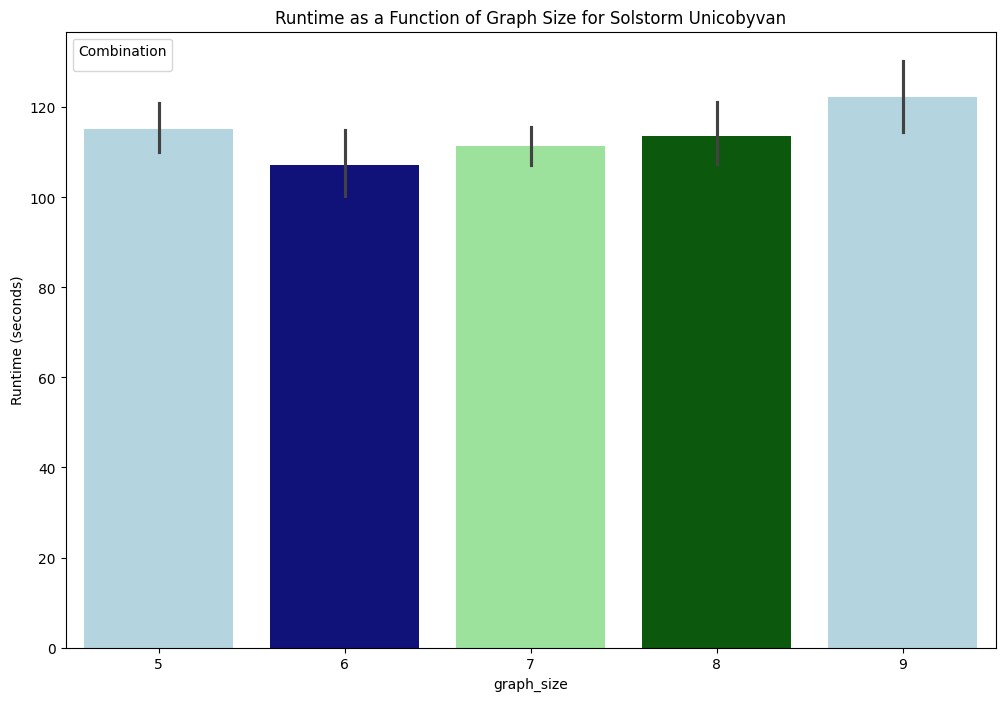

In [33]:
# Read the new results file
df_solstorm_unicobyvan = pd.read_csv('results_solstorm_UNICOBYVAN.csv', index_col=0)

# Plot runtime as a function of graph size
plt.figure(figsize=(12, 8))
sns.barplot(data=df_solstorm_unicobyvan, x='graph_size', y='time_elapsed',  palette=custom_colors)
plt.ylabel('Runtime (seconds)')
plt.title('Runtime as a Function of Graph Size for Solstorm Unicobyvan')
plt.legend(title='Combination')
plt.show()

C:\Users\torbjsme\AppData\Local\Temp\ipykernel_21140\2772574192.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_solstorm_unicobyvan2, x='graph_size', y='time_elapsed',  palette=custom_colors)
C:\Users\torbjsme\AppData\Local\Temp\ipykernel_21140\2772574192.py:6: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df_solstorm_unicobyvan2, x='graph_size', y='time_elapsed',  palette=custom_colors)
C:\Users\torbjsme\AppData\Local\Temp\ipykernel_21140\2772574192.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Combination')


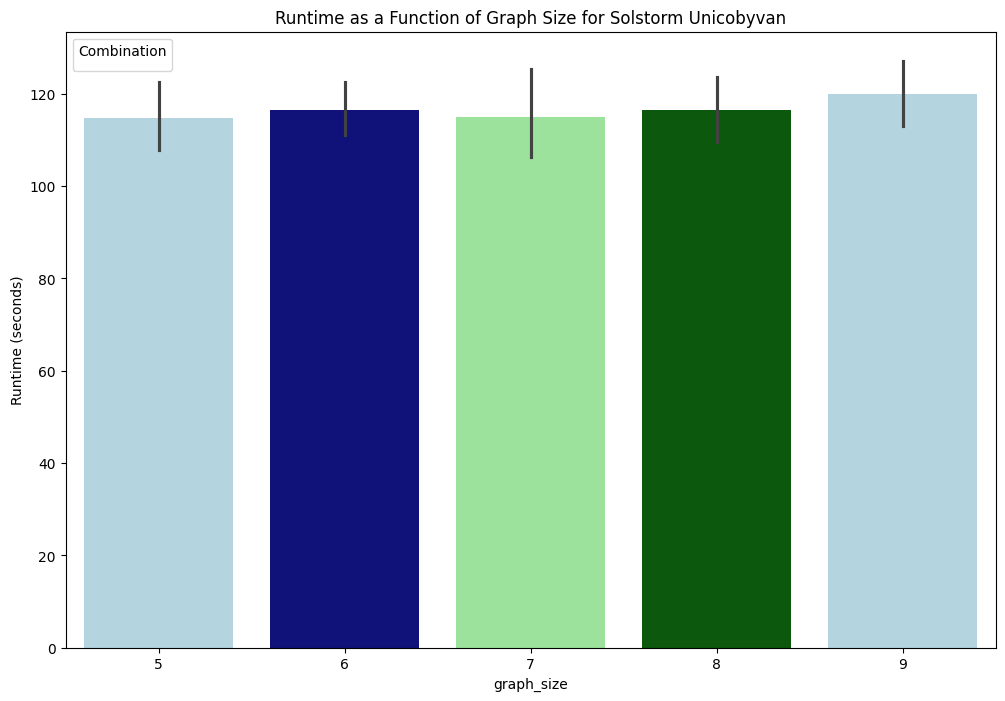

In [36]:
# Read the new results file
df_solstorm_unicobyvan2 = pd.read_csv('results_solstorm_UNICOBYVAN2.csv', index_col=0)

# Plot runtime as a function of graph size
plt.figure(figsize=(12, 8))
sns.barplot(data=df_solstorm_unicobyvan2, x='graph_size', y='time_elapsed',  palette=custom_colors)
plt.ylabel('Runtime (seconds)')
plt.title('Runtime as a Function of Graph Size for Solstorm Unicobyvan')
plt.legend(title='Combination')
plt.show()

C:\Users\torbjsme\AppData\Local\Temp\ipykernel_21140\3736139485.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_solstorm_unicobyvan, x='graph_size', y='percentage_optimal', palette=custom_colors)
C:\Users\torbjsme\AppData\Local\Temp\ipykernel_21140\3736139485.py:6: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df_solstorm_unicobyvan, x='graph_size', y='percentage_optimal', palette=custom_colors)
C:\Users\torbjsme\AppData\Local\Temp\ipykernel_21140\3736139485.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Combination')


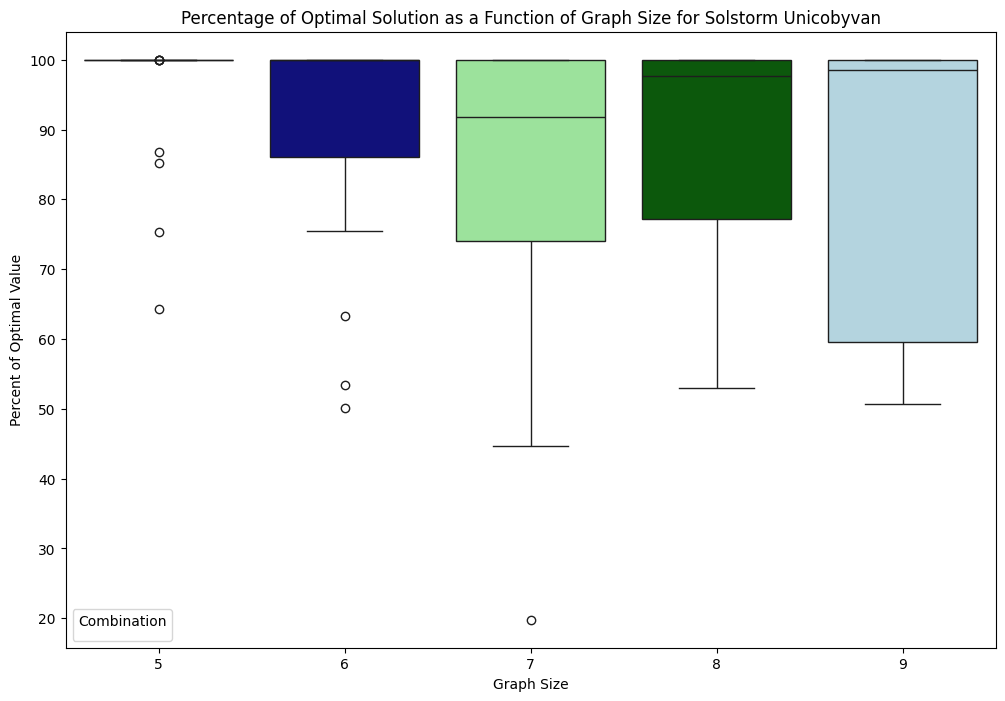

In [35]:

# Calculate percentage of optimal solution
df_solstorm_unicobyvan['percentage_optimal'] = 100 * (df_solstorm_unicobyvan['quantum_obj_value'] / df_solstorm_unicobyvan['classic_value'])

# Plot percentage of optimal solution as a function of graph size
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_solstorm_unicobyvan, x='graph_size', y='percentage_optimal', palette=custom_colors)
plt.xlabel('Graph Size')
plt.ylabel('Percent of Optimal Value')
plt.title('Percentage of Optimal Solution as a Function of Graph Size for Solstorm Unicobyvan')
plt.legend(title='Combination')
plt.show()

C:\Users\torbjsme\AppData\Local\Temp\ipykernel_21140\3496958626.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_solstorm_unicobyvan2, x='graph_size', y='percentage_optimal', palette=custom_colors)
C:\Users\torbjsme\AppData\Local\Temp\ipykernel_21140\3496958626.py:6: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df_solstorm_unicobyvan2, x='graph_size', y='percentage_optimal', palette=custom_colors)
C:\Users\torbjsme\AppData\Local\Temp\ipykernel_21140\3496958626.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Combination')


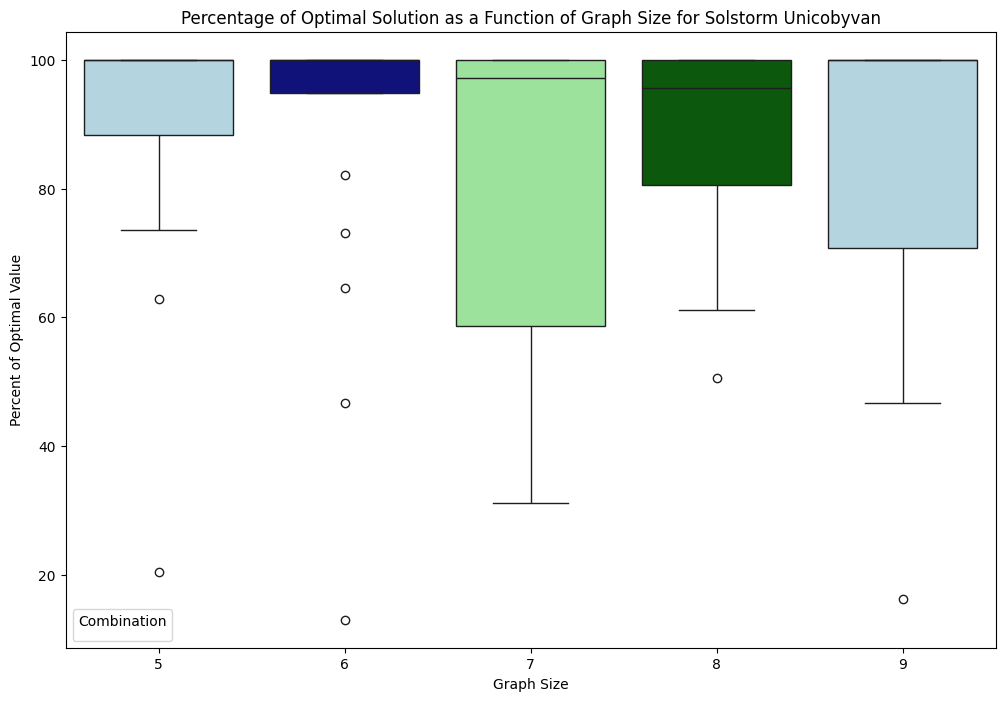

In [37]:

# Calculate percentage of optimal solution
df_solstorm_unicobyvan2['percentage_optimal'] = 100 * (df_solstorm_unicobyvan2['quantum_obj_value'] / df_solstorm_unicobyvan2['classic_value'])

# Plot percentage of optimal solution as a function of graph size
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_solstorm_unicobyvan2, x='graph_size', y='percentage_optimal', palette=custom_colors)
plt.xlabel('Graph Size')
plt.ylabel('Percent of Optimal Value')
plt.title('Percentage of Optimal Solution as a Function of Graph Size for Solstorm Unicobyvan')
plt.legend(title='Combination')
plt.show()